<a href="https://colab.research.google.com/github/PouriaAzadehR/Smart-Odometer-Reader/blob/main/smart-odometer-reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
!pip install easyocr
!pip install ultralytics
!pip install torchmetrics

In [ ]:
import yaml
from ultralytics import YOLO
from PIL import Image
import os
import cv2
import json
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from difflib import SequenceMatcher
from torchmetrics.text import CharErrorRate, WordErrorRate

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Data Foldering
Dataset should be divided to two folders images and labels and each of those should be divided to two folders train and val.

In [ ]:


yaml_filename = 'odometer_dataset.yaml'

data = {
    'train': '/content/drive/MyDrive/car_dataset/images/train',
    'val': '/content/drive/MyDrive/car_dataset/images/val',
    'nc': 1,
    'names': ['odometer']  # Ensure this is a list, not a string
}
with open(yaml_filename, 'w') as file:
    yaml.dump(data, file, default_flow_style=None)

# Yolo8 Nano

## Loading Pretrained Model

In [ ]:
# 3. Create Yolo model
model = YOLO('yolov8n.yaml')  # creates Yolo object from 'yolov8n.yaml' configuration file.
model = YOLO('yolov8n.pt')  # Loads pretrained weights
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights


100%|██████████| 6.23M/6.23M [00:00<00:00, 89.4MB/s]


Transferred 355/355 items from pretrained weights


## Training Yolo

In [ ]:
model.train(data='{}'.format(yaml_filename), epochs=30, patience=10, batch=16, imgsz=640, pretrained=True)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=odometer_dataset.yaml, epochs=30, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 19.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/car_dataset/labels/train... 94 images, 0 backgrounds, 0 corrupt: 100%|██████████| 94/94 [02:15<00:00,  1.44s/it]

train: New cache created: /content/drive/MyDrive/car_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/car_dataset/labels/val... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:38<00:00,  1.62s/it]

val: New cache created: /content/drive/MyDrive/car_dataset/labels/val.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      2.351      5.342      1.586         18        640: 100%|██████████| 6/6 [01:32<00:00, 15.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.37s/it]

                   all         24         24   0.000694      0.208   0.000602   0.000168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      2.275      4.302      1.462         23        640: 100%|██████████| 6/6 [01:34<00:00, 15.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.57s/it]

                   all         24         24    0.00264      0.792     0.0516     0.0212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.954      3.493       1.22         17        640: 100%|██████████| 6/6 [01:57<00:00, 19.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.27s/it]

                   all         24         24    0.00319      0.958      0.221     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.839      2.805      1.214         27        640: 100%|██████████| 6/6 [01:44<00:00, 17.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.07s/it]

                   all         24         24    0.00278      0.833     0.0138    0.00435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G       1.73      2.621      1.224         23        640: 100%|██████████| 6/6 [01:47<00:00, 17.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.96s/it]

                   all         24         24    0.00292      0.875    0.00794    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.721      2.364      1.248         27        640: 100%|██████████| 6/6 [01:48<00:00, 18.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.30s/it]

                   all         24         24    0.00264      0.792    0.00393    0.00166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.656      2.363      1.257         25        640: 100%|██████████| 6/6 [01:32<00:00, 15.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.84s/it]

                   all         24         24    0.00292      0.875    0.00466    0.00203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.614      1.976      1.134         26        640: 100%|██████████| 6/6 [01:30<00:00, 15.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.18s/it]

                   all         24         24    0.00306      0.917    0.00776     0.0041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G       1.71      2.129       1.21         31        640: 100%|██████████| 6/6 [01:22<00:00, 13.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.09s/it]

                   all         24         24    0.00278      0.833    0.00464      0.002



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.685       2.03      1.138         26        640: 100%|██████████| 6/6 [01:25<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.20s/it]

                   all         24         24          1      0.142      0.361      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.686      1.992        1.1         20        640: 100%|██████████| 6/6 [01:29<00:00, 14.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.44s/it]

                   all         24         24       0.32      0.158      0.138     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.608      1.854      1.134         25        640: 100%|██████████| 6/6 [01:25<00:00, 14.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.16s/it]

                   all         24         24     0.0164      0.208      0.018    0.00838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.518      1.869      1.132         19        640: 100%|██████████| 6/6 [01:22<00:00, 13.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.42s/it]

                   all         24         24     0.0217      0.208     0.0187     0.0084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.503      1.699      1.124         31        640: 100%|██████████| 6/6 [01:21<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.42s/it]

                   all         24         24          1      0.125       0.59      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G       1.44      1.681      1.122         33        640: 100%|██████████| 6/6 [01:24<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.62s/it]

                   all         24         24     0.0365     0.0833      0.106     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.412      1.631      1.129         24        640: 100%|██████████| 6/6 [01:29<00:00, 14.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.91s/it]

                   all         24         24      0.937      0.615      0.778      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.461      1.679      1.181         26        640: 100%|██████████| 6/6 [01:27<00:00, 14.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.10s/it]

                   all         24         24      0.886      0.583      0.774      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.383      1.558      1.118         26        640: 100%|██████████| 6/6 [01:20<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.30s/it]

                   all         24         24      0.922      0.708      0.835      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.395        1.5      1.091         33        640: 100%|██████████| 6/6 [01:19<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.87s/it]

                   all         24         24          1      0.774      0.912      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G       1.42      1.388      1.097         26        640: 100%|██████████| 6/6 [01:23<00:00, 13.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.15s/it]

                   all         24         24      0.907       0.75      0.842      0.443


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      1.356      1.872      1.201         14        640: 100%|██████████| 6/6 [01:33<00:00, 15.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.10s/it]

                   all         24         24      0.986       0.75      0.878      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      1.278      1.796       1.16         14        640: 100%|██████████| 6/6 [01:30<00:00, 15.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.34s/it]

                   all         24         24      0.808      0.701      0.813      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      1.336      1.727      1.156         14        640: 100%|██████████| 6/6 [01:21<00:00, 13.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.79s/it]

                   all         24         24      0.776      0.708      0.848       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      1.225      1.562      1.079         14        640: 100%|██████████| 6/6 [01:21<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.10s/it]

                   all         24         24      0.836      0.792       0.81      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      1.207      1.504      1.067         14        640: 100%|██████████| 6/6 [01:18<00:00, 13.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.93s/it]

                   all         24         24      0.884      0.792      0.826      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G      1.202      1.473      1.077         14        640: 100%|██████████| 6/6 [01:25<00:00, 14.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.62s/it]

                   all         24         24      0.868      0.822      0.827       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      1.214      1.404      1.075         14        640: 100%|██████████| 6/6 [01:29<00:00, 14.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.11s/it]

                   all         24         24      0.872      0.856      0.827       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      1.124      1.372      1.058         14        640: 100%|██████████| 6/6 [01:37<00:00, 16.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.20s/it]

                   all         24         24      0.901      0.917      0.899      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      1.192      1.386      1.058         14        640: 100%|██████████| 6/6 [01:27<00:00, 14.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.52s/it]

                   all         24         24      0.902      0.917      0.917      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G       1.13      1.328      1.031         14        640: 100%|██████████| 6/6 [01:21<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.72s/it]

                   all         24         24      0.902      0.917      0.921      0.503



30 epochs completed in 0.825 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.03s/it]


                   all         24         24      0.902      0.917      0.921      0.503
Speed: 2.7ms preprocess, 215.1ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b0b3089b5e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Choosing Best of Yolo Or Loading Existing Model

In [ ]:
model = YOLO('runs/detect/train2/weights/best.pt')

# Predicting Bounding Boxes

In [ ]:
im = Image.open(
    'C:/Users/Administrator/PycharmProjects/YOLO&OCR/car_dataset/images/val/c5bb919e-ece4-4c46-a62f-e5bf3e5807e3.jpeg')
results = model.predict(source=im, save=True)

In [ ]:
im_dir = '/content/drive/MyDrive/car_dataset/images/val'
results = model.predict(source=im_dir, save=True)


image 1/24 /content/drive/MyDrive/car_dataset/images/val/0c70e8b8-2c21-4faa-a1dd-1e0ee6f02e58.jpeg: 480x640 1 odometer, 201.6ms
image 2/24 /content/drive/MyDrive/car_dataset/images/val/0caa5ccf-61be-4111-a75d-9285c9956b58.jpeg: 448x640 1 odometer, 163.2ms
image 3/24 /content/drive/MyDrive/car_dataset/images/val/1aeb3991-9a35-4823-b2e3-339b1e6dd53b.jpeg: 448x640 1 odometer, 139.9ms
image 4/24 /content/drive/MyDrive/car_dataset/images/val/1c6142f6-5eb2-43d8-a347-78d4c6156a27.jpeg: 448x640 1 odometer, 143.6ms
image 5/24 /content/drive/MyDrive/car_dataset/images/val/2ce7942a-399f-44e9-a42d-8a2e220b10ec.jpeg: 448x640 1 odometer, 144.2ms
image 6/24 /content/drive/MyDrive/car_dataset/images/val/3aece9a1-1dce-4de2-9f1a-80d3c81c43bd.jpeg: 448x640 1 odometer, 148.3ms
image 7/24 /content/drive/MyDrive/car_dataset/images/val/3be914c3-8fe1-4486-82a5-c8a6c16b19cb.jpeg: 448x640 1 odometer, 149.5ms
image 8/24 /content/drive/MyDrive/car_dataset/images/val/3c3fde66-9bb3-4abc-8841-5bd604800e0d.jpeg: 448

Preparing EasyOCR

In [ ]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

# Input Image

In [ ]:
image_path = "/content/drive/MyDrive/car_dataset/images/val/fc5013f1-6cde-48f7-ab13-8aa2d924dd52.jpeg"
image = cv2.imread(image_path)
img = image.copy()

# Odometer Recognition

In [ ]:
v8_results = model.predict(image_path)
prediction = v8_results[0]
boxes = prediction.boxes
try:
    xyxy = boxes.xyxy[0]
except IndexError:
    print("No bounding boxes found.")


image 1/1 /content/drive/MyDrive/car_dataset/images/val/fc5013f1-6cde-48f7-ab13-8aa2d924dd52.jpeg: 480x640 1 odometer, 206.7ms
Speed: 3.9ms preprocess, 206.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


## Cropped Image

In [ ]:
cropped = image[int(xyxy[1]): int(xyxy[3]), int(xyxy[0]): int(xyxy[2])]
cropped

array([[[195, 155, 190],
        [189, 148, 175],
        [185, 143, 161],
        ...,
        [185, 127, 122],
        [183, 127, 122],
        [183, 127, 122]],

       [[194, 156, 186],
        [192, 150, 175],
        [191, 146, 165],
        ...,
        [184, 125, 123],
        [185, 127, 122],
        [185, 127, 122]],

       [[194, 155, 181],
        [193, 150, 171],
        [188, 143, 159],
        ...,
        [187, 125, 125],
        [187, 126, 124],
        [186, 125, 123]],

       ...,

       [[114, 107, 110],
        [117, 108, 111],
        [119, 108, 111],
        ...,
        [126, 112, 113],
        [121, 110, 113],
        [114, 104, 110]],

       [[109, 103, 108],
        [111, 105, 110],
        [111, 104, 109],
        ...,
        [112, 101, 103],
        [112, 103, 106],
        [110, 103, 108]],

       [[110, 106, 111],
        [110, 106, 111],
        [112, 106, 111],
        ...,
        [108, 102, 103],
        [110, 103, 106],
        [110, 104, 109]]], dtype=uint8)

## Bounding Box

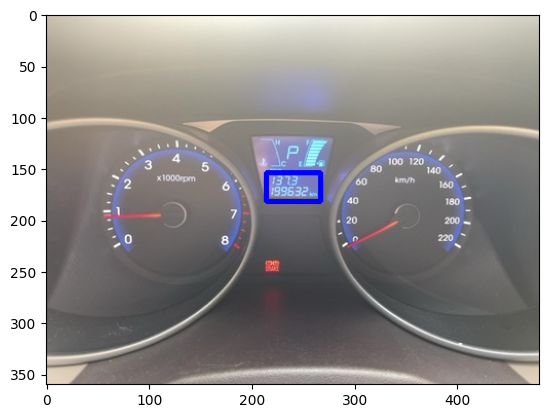

In [ ]:
cv2.rectangle(img, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (255, 0, 0), 3)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Enhancing Cropped Image

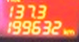

In [ ]:
from PIL import Image, ImageFilter, ImageEnhance

imcropped = Image.fromarray(np.uint8(cropped))

scale_factor = 1.5  # Adjust scale factor according to your needs
new_dimensions = (int(imcropped.width * scale_factor), int(imcropped.height * scale_factor))
resized_image =imcropped.resize(new_dimensions, Image.Resampling.LANCZOS)

# Enhance image sharpness
enhancer = ImageEnhance.Sharpness(resized_image)
sharpened_image = enhancer.enhance(2.0)

# Enhance image contrast
enhancer = ImageEnhance.Contrast(sharpened_image)
contrast_enhanced_image = enhancer.enhance(2.0)

# Enhance image color
enhancer = ImageEnhance.Color(contrast_enhanced_image)
color_enhanced_image = enhancer.enhance(1.5)

# Apply a mild smoothing filter
smoothed_image = color_enhanced_image.filter(ImageFilter.SMOOTH_MORE)
smoothed_image

In [ ]:
ocr_results = reader.readtext( np.array(smoothed_image), allowlist='0123456789km')
value = []

for result in ocr_results:
    if result is None:
        continue
    value.append(result[1])

## OCR Output

In [ ]:
integer_list = [int(item) for item in value]
# Find the maximum value in the list of integers
max_value = max(integer_list)
print(max_value)

199632


In [ ]:
import shutil
from google.colab import files

# Directory you want to download
folder_path = '/content/runs'
zip_file_path = '/content/runs.zip'

# Compress the folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)
print("Folder compressed into a zip file.")

# Download the file to your local machine
files.download(zip_file_path)
print("Download started...")


Folder compressed into a zip file.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download started...
